<hr style="height:10px">

<div class='container2'>
    <h1>Compass UOL - Programa de Bolsas Data-Science AWS</h1>
</div>

<hr style="height:5px">

<h2>Projeto da Sprint 2: Análise Explanatória da base Olist Store e-commerce</h2>

<h3>Bolsista: Lucas Oliveira</h3>

<hr style="height:2px">


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import folium
from folium.plugins import HeatMap

import warnings 
warnings.filterwarnings('ignore')

## 1) Import de dados

### 1.1) Importando dataset olist_orders_dataset e identificando dados faltantes, duplicados, outliers e distribuiço es anormais.

In [2]:
# Importando dataset olist_orders_dataset
df = pd.read_csv('.\\Datasets\\olist_orders_dataset.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
print(f'>>> olist_orders_df \nNº de Linas: {df.shape[0]} \nNº de Colunas:{df.shape[1]}')

>>> olist_orders_df 
Nº de Linas: 99441 
Nº de Colunas:8


In [4]:
print('Tem verificando se há valores nulos.')
print(df.isnull().sum())

Tem verificando se há valores nulos.
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [5]:
# numero valores nulos e filtro dos valores nulos
print(df['order_approved_at'].isnull().sum())
df.loc[df['order_approved_at'].isnull() == True]

160


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Existem valores nulos, porém essas colunas não serão utilizadas.

In [6]:
# verificanod se ha valores duplicados no df por completo e na coluna de identificação.
print('\nValores_duplicados coluna order_id: ',df['order_id'].duplicated().sum())
print('Valores_duplicados df: ',df.duplicated().sum())


Valores_duplicados coluna order_id:  0
Valores_duplicados df:  0


Não há linhas duplicadas no df e também na coluna de identificação do pedido.

### 1.2) Importando dataset olist_order_items_dataset e verificando se duplicatas e valores nulos.

In [7]:
# Importando dataset olist_order_items_dataset
df_2 = pd.read_csv('.\\Datasets\\olist_order_items_dataset.csv')
df_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
print(f'>>> olist_order_items_dataset \nNº de Linhas: {df_2.shape[0]} \nNº de Colunas:{df_2.shape[1]}')

>>> olist_order_items_dataset 
Nº de Linhas: 112650 
Nº de Colunas:7


In [9]:
# Verificando a existencia de dados nulos
print('Tem valores nulos?')
print(df_2.isnull().sum())

Tem valores nulos?
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [10]:
print('\nValores_duplicados coluna order_id: ',df_2['order_id'].duplicated().sum())
print('Valores_duplicados no df: ',df_2.duplicated().sum())


Valores_duplicados coluna order_id:  13984
Valores_duplicados no df:  0


Não há linhas duplicadas no df. Existe a repetição dos ids dos pedidos, mas neste caso não há problemas.

### 1.3) Unindo os dfs  (olist_orders_dataset) + (olist_order_items_dataset)

In [11]:
# Unindo os dfs  (olist_orders_dataset) + (olist_order_items_dataset)
df = pd.merge(df, df_2, on='order_id', how='inner')

In [12]:
print(f'>>> Df apos o merge: \nNº Linas: {df.shape[0]} \nNº Colunas:{df.shape[1]}')


>>> Df apos o merge: 
Nº Linas: 112650 
Nº Colunas:14


In [13]:
print('Tem valores nulos? \n',df.isnull().sum())

Tem valores nulos? 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64


In [14]:
print('\nValores duplicados coluna order_id: ',df['order_id'].duplicated().sum())
print('Valores duplicados df: ',df.duplicated().sum())


Valores duplicados coluna order_id:  13984
Valores duplicados df:  0


Os valores da duplicados coluna 'order_id' permaneceu igual (13984) e o df em si não tem linhas duplicadas. As colunas com valores nulos permaneceram sem alteração tbm. 

### 1.4) Importando dataset olist_products_dataset

In [15]:
# Importando dataset olist_products_dataset
df_2 = pd.read_csv('.\\Datasets\\olist_products_dataset.csv')
df_2.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
print(f'>>> olist_products_dataset \nNº Linas: {df_2.shape[0]} \nNº Colunas:{df_2.shape[1]}')
# print(df_2.columns)

>>> olist_products_dataset 
Nº Linas: 32951 
Nº Colunas:9


In [17]:
# verificando se há valores nulos
print('Tem valores nulos? \n',df_2.isnull().sum())

Tem valores nulos? 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


* Tratamento dos dados nulos da coluna **product_category_name**
Para tentar diminuir os valores nulos da coluna de nome, será feito uma cópia df_2 para um df auxiliar que terá os valores nulos excluidos, caso o df_2 tenha algum nome em branco que tenha id igual do df_aux, o nome será inserido no lugar do valor nulo.


In [18]:
# # para tentar diminuir os valores nulos da coluna nome, o primeiro passo é pegar todos os nomes e ids e colocar em um df auxiliar.
# df_aux = df_2[['product_id', 'product_category_name']]
# print('Tamanho original do df_aux: ', len(df_aux))
# print('Contagem dos valores nulos: ',df_aux['product_category_name'].isnull().sum())

# # depois excluir os valores nulos do df_aux.
# df_aux.dropna(inplace=True)
# print('Tamanho apos exluir valores nulos: ',len(df_aux))

# # excluir os valores duplicados para não aumentar o numero de cols no df.
# print('Contagem dos valores duplicados: ',df_aux.duplicated().sum())
# # print(df_aux.shape)
# df_aux = df_aux.drop_duplicates()
# print('Tamanho final apos exluir duplicados: ',df_aux.shape)

# # O merge para adicionar a nova coluna de nome de produto, caso tenha algum 'product_id' igual para um produto com nome e um com valor nulo a nova coluna escrevera o nome do produto.
# df_2= df_2.merge(df_aux[['product_id', 'product_category_name']], on='product_id', how='left', suffixes=('', '_novo'))

# print(df_2.shape)

# print('Valores nulos Coluna nova; ', df_2['product_category_name_novo'].isnull().sum())
# print('Valores nulos Coluna original; ', df_2['product_category_name'].isnull().sum())

Como não funcionou, será comentada as linhas.

In [19]:
# Verificando os valores duplicados
print('\nValores_duplicados coluna product_id: ',df_2['product_id'].duplicated().sum())
print('Valores_duplicados no df: ',df_2.duplicated().sum())


Valores_duplicados coluna product_id:  0
Valores_duplicados no df:  0


In [20]:
# Unindo os dfs  (olist_orders_dataset) + (olist_order_items_dataset)
df = pd.merge(df, df_2, on='product_id', how='inner')

In [21]:
print(f'>>> Df após o merge: \nNº Linas: {df.shape[0]} \nNº Colunas: {df.shape[1]}')

>>> Df após o merge: 
Nº Linas: 112650 
Nº Colunas: 22


In [22]:
print('Tem valores nulos? \n',df.isnull().sum())

Tem valores nulos? 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64


Não há problemas nas colunas com valores nulos, pois elas serão excluidas.

In [23]:
print('\nValores duplicados coluna order_id: ',df['order_id'].duplicated().sum())
print('Valores duplicados df: ',df.duplicated().sum())


Valores duplicados coluna order_id:  13984
Valores duplicados df:  0


Não há linhas duplicadas no df. Existe a repetição dos ids dos pedidos, mas neste caso não há problemas.

Será selecionado e tratado apenas as colunas que farão sentido usalas.

In [24]:
df = df[['order_id', 'customer_id', 'order_status','order_purchase_timestamp','order_item_id', 'product_id', 'seller_id',
        'price', 'freight_value', 'product_category_name']] # order_approved_at

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

## 2) DESAFIO

Apresente estatística descritiva do dataset e ao final responda de forma visual (utilizando graficos) as 
seguintes perguntas utilizando os últimos 12 meses:



### 1 - **Aplicando o Filtro para os últimos 12 meses**

In [25]:
print('Menor data registrada: ',df['order_purchase_timestamp'].min())
print('Maior data registrada: ',df['order_purchase_timestamp'].max())

# # Converter a coluna para o tipo datetime 
# df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# df.info()

Menor data registrada:  2016-09-04 21:15:19
Maior data registrada:  2018-09-03 09:06:57


In [26]:
# Filtro de data para os ultimos 12 meses (considerou-se a maior data (2018-09-03 09:06:57), e não a atual (12/2024)) 
df = df.loc[(df['order_purchase_timestamp'] >= '2017-09-03') ]

print('Menor data registrada após filtro: ',df['order_purchase_timestamp'].min())
print('Maior data registrada após filtro: ',df['order_purchase_timestamp'].max())

Menor data registrada após filtro:  2017-09-03 01:41:54
Maior data registrada após filtro:  2018-09-03 09:06:57


- **Respondendo as questões**

### 1) Categorias com maior e menor receita.

In [27]:
df['order_status'].value_counts()

order_status
delivered     84643
shipped         816
canceled        364
invoiced        229
processing      189
Name: count, dtype: int64

Os pedidos com status **Canceled** e **Processing** serão retirados da analise. 
* **Canceled**: como o pedido foi cancelado ele não entra no receita da empresa.
* **Processing**: considerou o status como uma etapa após efetuar a compra e que necessita ainda de aprovação, por isto há risco do mesmo não virar receita.

In [28]:
df = df.loc[df['order_status'] !='canceled'] # escluindo os pedidos cancelados
df = df.loc[df['order_status'] !='processing'] # No status processando, pode ser que o produto não seja faturado.

# verificando os status apos o filtro
df['order_status'].value_counts()

order_status
delivered    84643
shipped        816
invoiced       229
Name: count, dtype: int64

Calculo das categorias com maior e menor receita.

In [141]:
receitas = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False) # Os nulos não vao cair no filtro do agrupamento. Os dados não poderão ser excluidos pois poderão fazer falta em analizes futuras. 

maior_receita = receitas.head(1)
y_maior_receita = maior_receita[0]
x_maior_receita = maior_receita.index[0]

menor_receita = receitas.tail(1)
y_menor_receita = menor_receita[0]
x_menor_receita = menor_receita.index[0]
# print('\n Categoria com maior receita:\n',x_maior_receita) # pega o primeiro  V. Roberto(934385.43)
# print('\n Categoria com menor receita:\n',x_menor_receita) # pega o ultimo item 

# receitas.head(10)

Text(0, 0.5, 'Receitas')

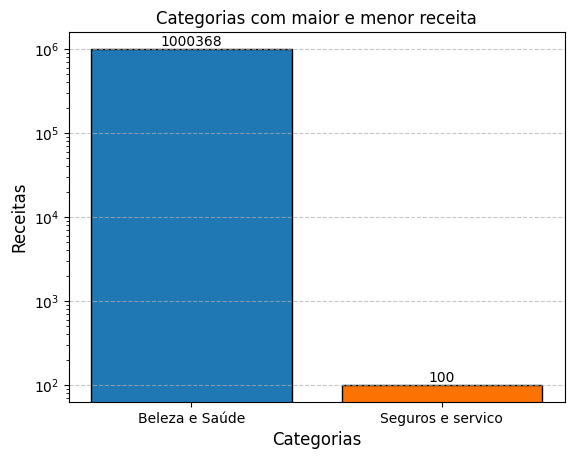

In [30]:
# Criar posição para cada barra
x_maior_receita = 'Beleza e Saúde'
x_menor_receita = 'Seguros e servico'
y_maior_receita = int(y_maior_receita)
y_menor_receita = int(y_menor_receita)
# Cria o grafico
plt.bar(x_maior_receita, y_maior_receita, label='Beleza e Saúde', edgecolor='black')
plt.bar(x_menor_receita, y_menor_receita,color= '#fc7303',label='Seguros e servico', edgecolor='black')
plt.yscale('log')
plt.xticks()
plt.text(x_maior_receita, y_maior_receita, str(y_maior_receita), 
             ha='center', va='bottom', fontsize=10)
plt.text(x_menor_receita, y_menor_receita, str(y_menor_receita), 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.title('Categorias com maior e menor receita')
plt.xlabel('Categorias',fontsize=12)
plt.ylabel('Receitas',fontsize=12)



In [31]:
# # Apenas para visualizar o preço aleatorio sem frete
# print('\nPreço sem frete: ', df['price'].loc[df['order_id']=='00143d0f86d6fbd9f9b38ab440ac16f5'].sum().round(2)) 
# df.loc[df['order_id']=='00143d0f86d6fbd9f9b38ab440ac16f5']#.sum().round(2)) 

# # O calculo bate com a formula pdf

- Os vendedores serão agrupados e os preços de todso os produtos serão somados, no final teremos a recita de cada vendedor.

In [32]:
# Agrupando os precos dos produtos comercializados por vendedores. (soma dos preços sem frete)
seller = df.groupby('seller_id')['price'].sum().sort_values(ascending=False) # O Agrupamento ficará da maior receita para a menor

### 2) Top 10 maiores sellers (com maior receita)? 

Como os ids dos sellers são muito longos para exibi-los no eixo x, foi criado um dicionário com chaves "Seller 1" até "Seller 10", onde as chaves retornam os ids de cada vendedor.

In [33]:
# Os dez primeiros vendedores.
top_sellers  = seller.head(10)
lista_sellers = top_sellers.index.to_list()
lista_top_receitas = top_sellers.to_list()
lista_top_receitas


# Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_Top_seller= {f"Sell {i+1}": lista_sellers[i] for i in range(len(lista_sellers))}

# Exibindo o dicionário
# dicionario_Top_seller

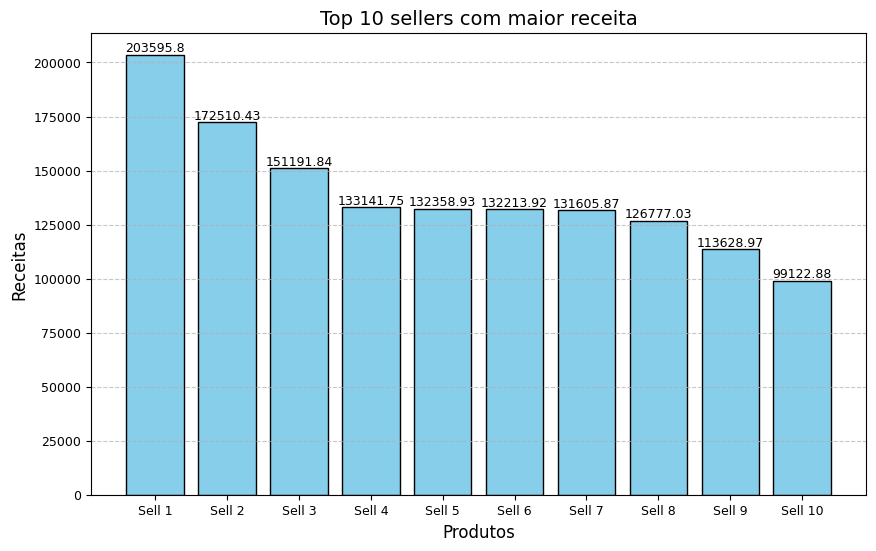

In [34]:
# # Criar posição para cada barra
x_maior_receita = list(dicionario_Top_seller.keys())
y_maior_receita = lista_top_receitas #int(y_maior_receita)

plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# # Cria o grafico
grafico = plt.bar(x_maior_receita, y_maior_receita, color='skyblue', edgecolor='black')
plt.xticks( fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_maior_receita)):
  plt.text(x_maior_receita[i], y_maior_receita[i], str(round(y_maior_receita[i], 3)), 
       ha='center', va='bottom', fontsize=9,)

plt.title('Top 10 sellers com maior receita', fontsize=14)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Receitas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

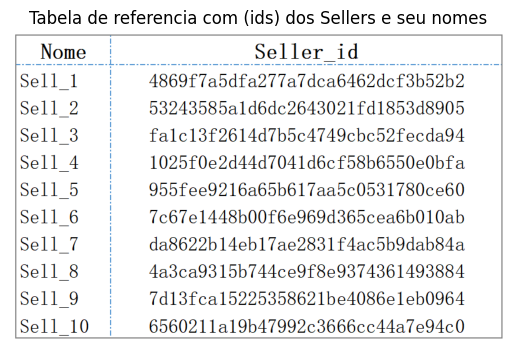

In [35]:
# Tabela com os ids dos Sellers com maior maiores receitas.
# Carregar a imagem
img = mpimg.imread('.\\imgs\\tab_top_sellers.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Remover os eixos para melhor visualização
plt.title('Tabela de referencia com (ids) dos Sellers e seu nomes', fontsize=12)
plt.show()


### 3) Top 10 piores sellers (com menor receita)? 

Como os ids dos sellers são muito longos para exibi-los no eixo x, foi criado um dicionário com chaves "Seller 1" até "Seller 10", onde as chaves retornam os ids de cada vendedor.

In [36]:
# Os dez ultimos vendedores.
under_sellers = seller.tail(10).sort_values() #O primeiro da lista é o com menor receita.

In [37]:
# Os dez ultimos vendedores.
lista_under_sellers = under_sellers.index.to_list()
lista_piores_receitas = under_sellers.to_list() # lista_piores_receitas

# Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_under_seller= {f"Sell_{i+1}": lista_under_sellers[i] for i in range(len(lista_under_sellers))}

# Exibir o dicionário
# dicionario_under_seller

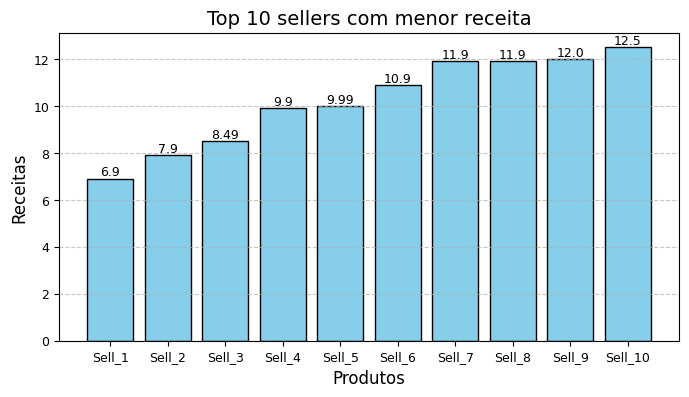

In [38]:
# Criar posição para cada barra
x_menor_receita = list(dicionario_under_seller.keys())
y_menor_receita = lista_piores_receitas #int(y_maior_receita)

plt.figure(figsize=(8, 4))  # Ajustar o tamanho da figura

# x_sel = list(dic_mais_concorrentes.keys())

grafico = plt.bar(x_menor_receita, y_menor_receita, color='skyblue', edgecolor='black')
plt.xticks( fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_menor_receita)):
  plt.text(x_menor_receita[i], y_menor_receita[i], str(round(y_menor_receita[i], 3)), 
       ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers com menor receita', fontsize=14)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Receitas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

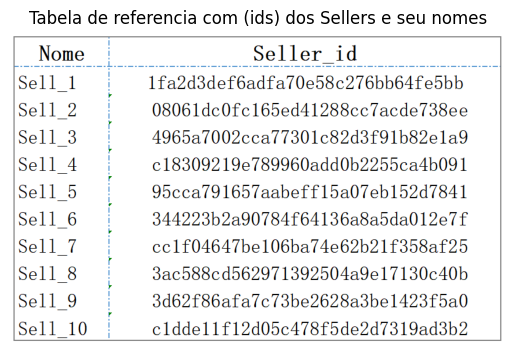

In [39]:
# Tabela com os ids dos Sellers com maior maiores receitas.
# Carregar a imagem
img = mpimg.imread('.\\imgs\\tab_under_sellers.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Remover os eixos para melhor visualização
plt.title('Tabela de referencia com (ids) dos Sellers e seu nomes', fontsize=12)
plt.show()

### 4) Existem sellers que vendem o mesmo produto? Se sim, quais sao? Qual e a variaçao de preço praticado entre os Sellers?

#### 4.1 - Existem sellers que vendem o mesmo produto? Se sim, quais sao?

Primeiro será separado todos os vendedores que vendem os mesmos produtos e será montado uma lista com os mesmos.

In [40]:
filtro_prod = df.groupby(['product_id'], as_index=False)['seller_id'].nunique()
filtro_prod = filtro_prod[filtro_prod['seller_id'] > 1] # Filtra produtos com mais de um vendedor.

# Busca no df original todos os produtos com mais de um vendedor 
concorrentes = df[df['product_id'].isin(filtro_prod['product_id'])] # concorrentes tem todos os vendedores que vendem produtos com o mesmo id que outro vendedor vende.

# cria uma lista com todos os ids de vendedore sem repetir 
lista_vendedores = concorrentes['seller_id'].to_list()
lista_vendedores = list(set(lista_vendedores)) # remover os vendedores que podem ser concorrentes de outros vendedores.

O número de vendedores que vendem o mesmo produto pode ser obtido dando um len na Lista, e obtemos a quantidade de vendedores.
- R) Sim existem vendeores que vendem o mesmo produto. São 631 vendedores.
- R) Os vendedores estão prestentes na lista abaixo, e os top 10 serão exibidos no gráfico e na tabela abaixo.

In [41]:
print(f'São exatamente {len(lista_vendedores)} que vendem produtos com pelo menos um concorrente.')
# Casos queira ver os 631 vendedores que vendem produtos com concorrentes, basta descomentar a linha abaixo.
# lista_vendedores 

São exatamente 631 que vendem produtos com pelo menos um concorrente.


Para cada vendedor será contado o numero de vendedores que comercializam o mesmo produto que ele. Para estes vendedores que comercializam produtos em como, serão chamados de concorrentes.

In [42]:
# Fazer uma lista com o numero de concorrentes de cada vendedor
top_vendedores_mais_concorrentes = concorrentes.groupby('seller_id')['product_id'].nunique().sort_values(ascending=False)

In [43]:
# Separando em top 10 vendedores com mais concorrentes.
top_vendedores_mais_concorrentes = top_vendedores_mais_concorrentes.head(10)
lista_ids_vendedores = top_vendedores_mais_concorrentes.index.to_list()
lista_qtd_concorrentes = top_vendedores_mais_concorrentes.to_list()
# Criação do dicionário com chaves "Seller 1" até "Seller 10"
dic_mais_concorrentes= {f"Sell_{i+1}": lista_ids_vendedores[i] for i in range(len(lista_ids_vendedores))}
# lista_ids_vendedores

 - Grafico e tabela com os top 10 vendedores com mais concorrentes

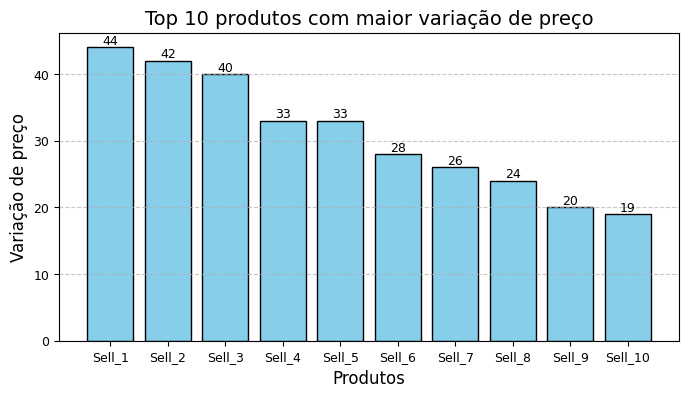

In [44]:
# Criar posição para cada barra
x_sel = list(dic_mais_concorrentes.keys())
y_qtd_concorrentes = lista_qtd_concorrentes #int(y_qtd_concorrentes)

plt.figure(figsize=(8, 4))  # Ajustar o tamanho da figura

x_sel = list(dic_mais_concorrentes.keys())

grafico = plt.bar(x_sel, y_qtd_concorrentes, color='skyblue', edgecolor='black')
plt.xticks( fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_qtd_concorrentes)):
  plt.text(x_sel[i], y_qtd_concorrentes[i], str(round(y_qtd_concorrentes[i], 3)), 
       ha='center', va='bottom', fontsize=9)

plt.title('Top 10 produtos com maior variação de preço', fontsize=14)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Variação de preço', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

Tabela com de referencia dos ids dos Sellers com o nome exibido no gráfio.

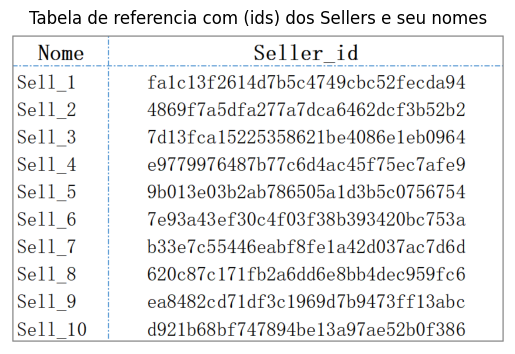

In [45]:
# Tabela com os ids dos Sellers concorrentes e os nomes atribuidos a eles.
# Carregar a imagem
img = mpimg.imread('.\\imgs\\tab_concorrntes.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Remover os eixos para melhor visualização
plt.title('Tabela de referencia com (ids) dos Sellers e seu nomes', fontsize=12)
plt.show()

#### 4.2) Qual e a variaçao de preço praticado entre os Sellers?

Para mostra a variação de preço entre produtos será utilizado o Desvio Padrão Populacional.

O desvio padrão populacional indica o quão espalhados os valores estão em relação à média.

Primeiro, será separada a variação de preços dos itens presentes no dataframe que contém apenas os vendedores concorrentes. Neste novo dataframe, constarão as medidas estatísticas para cada produto. Ao final, este conjunto de dados será ordenado com base na coluna de desvio padrão (std).

In [46]:
# Agrupar por produto e calcular estatísticas descritivas
tabela_variacao = concorrentes.groupby('product_id')['price'].agg(mean='mean', 
    min='min',max='max',std=lambda x: np.std(x, ddof=0)).reset_index()

# Exibir os resultados
# tabela_variacao

In [151]:
tabela_variacao.head(1)

,product_id,mean,min,max,std
0,00f8c37377b038c9c791128d2f928111,20.4,16.9,23.9,3.5


In [47]:
# Ordenando o novo df pela variação de preços (std) em ordem decrescente
# Filtrando os dez primeiros produtos com variação de preços.
top_variacao =  tabela_variacao.sort_values(by='std', ascending=False).head(10)

# Criando a lista para a plotagem 
lista_produtos = top_variacao['product_id'].to_list()
lista_variacao = top_variacao['std'].to_list()

# # Criação do dicionário de produtos "Prod_1" até "Prod_10", para caso seja necessário conferir.
dicionario_produtos= {f"Prod_{i+1}": lista_produtos[i] for i in range(len(lista_produtos))}
# dicionario_produtos

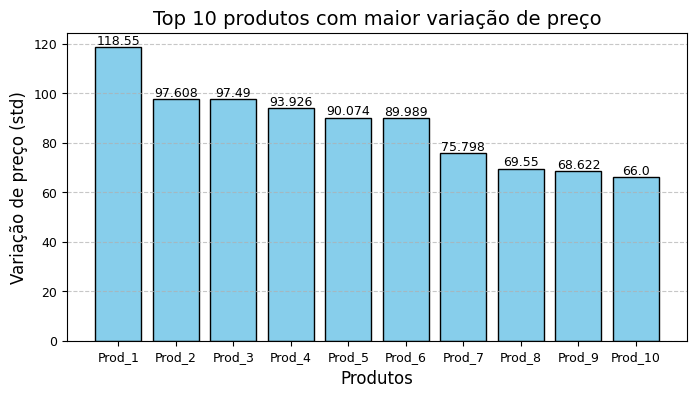

In [152]:
# Criar o grafico para visualizar a variação de preços (em top 10 variações)

plt.figure(figsize=(8, 4))  # Ajustar o tamanho da figura

x_prod = list(dicionario_produtos.keys())

grafico = plt.bar(x_prod, lista_variacao, color='skyblue', edgecolor='black')
plt.xticks( fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(lista_variacao)):
  plt.text(x_prod[i], lista_variacao[i], str(round(lista_variacao[i] , 3)), 
       ha='center', va='bottom', fontsize=9)

plt.title('Top 10 produtos com maior variação de preço', fontsize=14)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Variação de preço (std)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

Tabela com de referencia dos ids dos produtos com o nome exibido no gráfio.

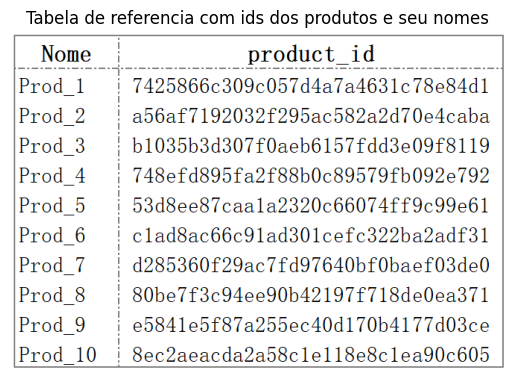

In [49]:
# Tabela com os ids dos produtos e o nome atribuido a eles.
# Carregar a imagem
img = mpimg.imread('.\\imgs\\tab_produto.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Remover os eixos para melhor visualização
plt.title('Tabela de referencia com ids dos produtos e seu nomes', fontsize=12)
plt.show()



### 5) Houve inflação no preço dos produtos ao passar do tempo? Se houve, de quanto foi a variaça o desta inflaça o em % e em R$?

In [50]:
# Verificando o tipo de dados da coluna order_purchase_timestamp
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85688 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  85688 non-null  object        
 1   customer_id               85688 non-null  object        
 2   order_status              85688 non-null  object        
 3   order_purchase_timestamp  85688 non-null  datetime64[ns]
 4   order_item_id             85688 non-null  int64         
 5   product_id                85688 non-null  object        
 6   seller_id                 85688 non-null  object        
 7   price                     85688 non-null  float64       
 8   freight_value             85688 non-null  float64       
 9   product_category_name     84607 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.2+ MB


In [51]:
# Criar uma coluna de período (mensal neste caso) # não será utilizado
# df['periodo'] = df['order_purchase_timestamp']#.dt.to_period('M')
# df.drop(columns=['order_purchase_timestamp'], inplace=True)
df.rename(columns={'order_purchase_timestamp': 'periodo'}, inplace=True)

# Calcular o preço médio por produto e período
preco_medio = df.groupby(['product_id', 'periodo']).agg({'price': 'sum'
             }).rename(columns={'price': 'preco'}).reset_index() # como o agrupamento é por produto e periodo, o preço médio é o preço total.


# # Ordenar os dados para calcular a variação percentual
preco_medio.sort_values(by=['product_id', 'periodo'], inplace=True)

# # Calcular a variação percentual no preço médio
preco_medio['variacao_percentual'] = preco_medio.groupby('product_id')['preco'].pct_change()* 100

# # Identificar se houve aumento (inflação)
preco_medio['variacao'] = preco_medio['variacao_percentual'].fillna(0) != 0
# preco_medio['aumento'] = np.where(preco_medio['variacao_percentual'] not in [np.nan, 0], True, False)
# # Resultado final
# preco_medio.head()


In [153]:
preco_medio

,product_id,periodo,preco,variacao_percentual,variacao,taxa_variacao
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,101.65,NaN,False,NaN
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,129.90,NaN,False,NaN
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,229.00,NaN,False,NaN
3,000b8f95fcb9e0096488278317764d19,2018-08-01 22:00:33,58.90,NaN,False,NaN
4,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,58.90,0.000000,False,1.000000
...,...,...,...,...,...,...
77764,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-04-19 10:12:12,34.99,16.672224,True,1.166722
77765,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-05-01 17:31:41,34.99,0.000000,False,1.000000
77766,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-07 16:07:57,34.99,0.000000,False,1.000000
77767,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,34.99,0.000000,False,1.000000


In [52]:
# df.info()

In [53]:
# calcula  a variação percentual
preco_medio['taxa_variacao'] = (preco_medio['variacao_percentual'] / 100 + 1) 

#Apenas para testar
# result = preco_medio.loc[preco_medio['product_id']=='53b36df67ebb7c41585e8d54d6772e08']\
#     .groupby('product_id')['taxa_variacao'].prod() #agg(lambda x: if j != 0 else x)
# result

In [54]:
serie_aux = preco_medio.groupby('product_id')['taxa_variacao'].prod()

df_aux = preco_medio[['product_id','periodo','preco']].sort_values(by='periodo').drop_duplicates(subset=['product_id'])
# df_aux['taxa_variacao'] = variacao_preco.groupby('product_id')['taxa_variacao'].prod()

In [55]:
df_aux = df_aux.merge(serie_aux, on='product_id', how='inner')
df_aux['preco_inflacao'] = df_aux['preco'] * df_aux['taxa_variacao']
df_aux.head(10) # aqui contem o preço, o preço corrigido pela inflação e a taxa de inflação.

,product_id,periodo,preco,taxa_variacao,preco_inflacao
0,83fe1ea6fd12c51fcd341a9968e65cc3,2017-09-03 01:41:54,44.90,0.890869,40.00
1,a5215a7a9f46c4185b12f38e9ddf2abc,2017-09-03 02:42:26,1200.00,1.116667,1340.00
2,bef6177f54efb9a6218e124b629fc152,2017-09-03 04:38:18,339.90,1.000000,339.90
3,45bb3dc2bad11474b99f167b3e95fd02,2017-09-03 07:48:51,489.99,1.000000,489.99
4,08574b074924071f4e201e151b152b4e,2017-09-03 08:06:30,198.00,0.510101,101.00
5,53b36df67ebb7c41585e8d54d6772e08,2017-09-03 08:23:32,849.50,0.131842,112.00
6,153c09356373389880c8dc8d701a60d7,2017-09-03 08:38:24,143.35,1.000000,143.35
7,c4eee3eae1ec39ae9e5f25b18f0cb4b6,2017-09-03 09:17:05,45.99,1.000000,45.99
8,3976c6466748442470251341eb6f92a3,2017-09-03 09:33:51,1798.00,1.000000,1798.00
9,5c0826f946c32406d5baa79544668b4c,2017-09-03 09:43:43,99.99,1.000000,99.99


In [56]:
# Ordena as maiores variações
maiores_variacoes = df_aux.sort_values(by='taxa_variacao', ascending=False).head(10)
# maiores_variacoes.loc[df_aux['product_id']=='00fefaf41156bb4b0d850fb27da97897']

In [57]:
maiores_variacoes

,product_id,periodo,preco,taxa_variacao,preco_inflacao
8494,0e1fa2aadc04afbf8fb30200aeba06a2,2017-12-05 17:39:58,129.00,9.000000,1161.00
338,5f00c50de3d989194f0439e343480372,2017-09-05 18:15:24,77.99,7.692525,599.94
21743,aeb767ca82c5a6cca8bbac33c4e21579,2018-06-25 12:37:03,28.00,7.285714,204.00
17487,f2a1b32f85cad59ff2a8444154ac25f0,2018-04-20 17:21:55,190.00,7.000000,1330.00
9122,d2bea3c01e172037caa99b2d138f39d0,2017-12-13 14:11:15,19.90,6.904523,137.40
5802,71fc2a7d96a222b04e4131cfc006f265,2017-11-14 00:00:56,99.99,6.534653,653.40
21657,9ac1378f05cd222b3fb34a3cccc626c7,2018-06-23 23:00:04,31.90,6.253918,199.50
7912,2b7aa376a6e728560bddb5558cc48e89,2017-11-29 18:56:50,114.99,6.104357,701.94
10898,a0d20b18f2a06b34206ba5933b4ec05b,2018-01-14 14:20:51,49.90,6.000000,299.40
3129,f3ccdb9f9c7f31e0efd626e9110b85f5,2017-10-07 17:30:01,116.90,6.000000,701.40


- Sim houve inflação e os principais aumentos podem ser conferidos no gráfico.

In [58]:
#cria as listas para plotagem do grafico
prod = maiores_variacoes['product_id'].to_list()
y_variacoes = maiores_variacoes['taxa_variacao'].to_list()
y_preco = maiores_variacoes['preco'].to_list()
y_preco_inflacao = maiores_variacoes['preco_inflacao'].to_list()

# Criação do dicionário de produtos "Prod_1" até "Prod_10", para caso seja necessário conferir.
dicionario_produtos= {f"Prod_{i+1}": prod[i] for i in range(len(prod))}
# dicionario_produtos


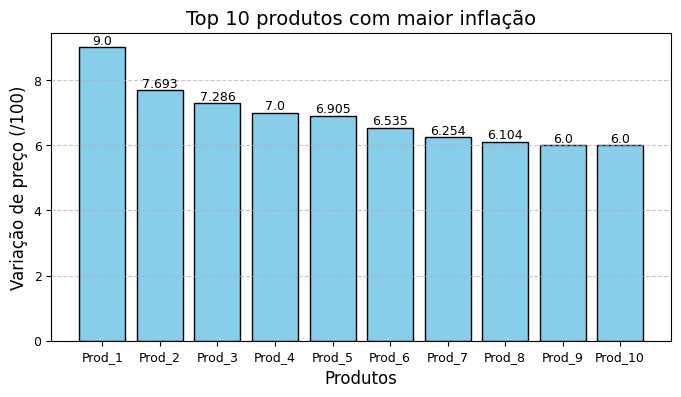

In [59]:
#criando o grafico de produtos com maior inflação no periodo de 12 meses
plt.figure(figsize=(8, 4))  # Ajustar o tamanho da figura

x_prod = list(dicionario_produtos.keys())

grafico = plt.bar(x_prod, y_variacoes, color='skyblue', edgecolor='black')
plt.xticks( fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_variacoes)):
  plt.text(x_prod[i], y_variacoes[i], str(round(y_variacoes[i], 3)), 
       ha='center', va='bottom', fontsize=9)

plt.title('Top 10 produtos com maior inflação', fontsize=14)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Variação de preço (/100)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

* Grafico com os preços em R$ (Reais)

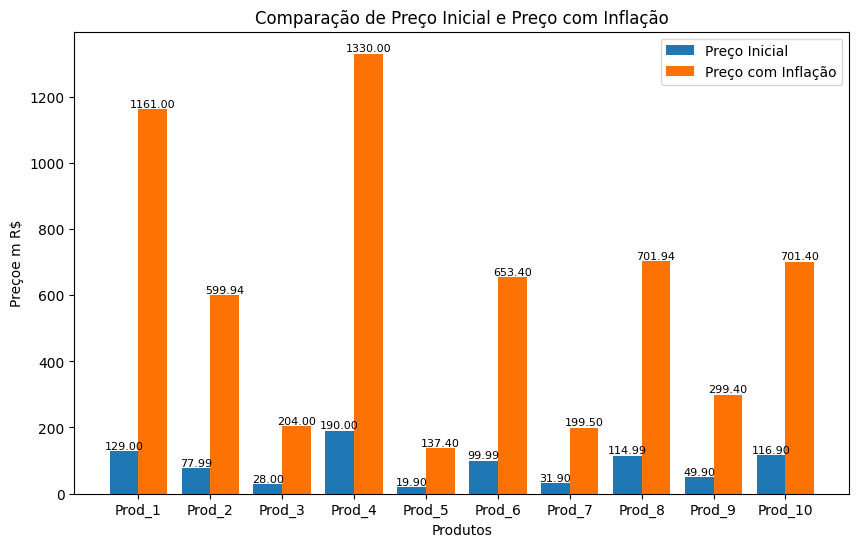

In [60]:
# Ajustar o tamanho da figura
plt.figure(figsize=(10, 6))
# Definindo a largura das barras
width = 0.4

# Definindo a posição das barras
r1 = range(len(y_preco))
r2 = [x + width for x in r1]

# Criando o gráfico de barras
plt.bar(r1, y_preco, width=width, label='Preço Inicial')
plt.bar(r2, y_preco_inflacao, width=width, color='#fc7303', label='Preço com Inflação')

# Adicionando os valores nas barras
for i in range(len(r1)):
    plt.text(r1[i], y_preco[i], f'{y_preco[i]:.2f}', ha='center', va='bottom', fontsize=8)
    plt.text(r2[i], y_preco_inflacao[i], f'{y_preco_inflacao[i]:.2f}', ha='center', va='bottom', fontsize=8)

# Adicionando os rótulos e título
plt.xlabel('Produtos')
plt.ylabel('Preçoe m R$')
plt.title('Comparação de Preço Inicial e Preço com Inflação')
plt.xticks([r + width/2 for r in range(len(y_preco))], x_prod)
plt.legend()

# Exibindo o gráfico
plt.show()


### 6) Top 10 melhores sellers (com mais reviews positivas)? ** Observaça o: As review tem score de 1 a 5, defina um crite rio para Review boas. 
Para analise dos reveiws dos vendedores um novo conjunto de dados será criado. 

Importando o df de reviews

In [61]:
# Import olist_order_reviews_dataset
df_2 = pd.read_csv('.\\Datasets\\olist_order_reviews_dataset.csv')
# df_2.head()

In [62]:
# # df_2[['review_score','review_comment_title','review_comment_message'] and df_2['review_comment_message'] != np.nan].head(20)
# df_2[['review_score','review_comment_title','review_comment_message']].loc[df_2['review_comment_message'].notna()].head(20)

Será feito um merge do o primiero dataframe trabalhado para pegar a informação de id do vendedor.

In [63]:
# Para a União dar seto tem que inverter a ordem do merge, 
df_reviews = df_2.merge(df[['order_id', 'seller_id']], on='order_id', how='inner') #criando um novo df só para analise dos reviews.

# As colunas desnescessárias foram excluidas.
df_reviews =  df_reviews[['review_id', 'order_id', 'review_score','review_comment_message','review_answer_timestamp','seller_id']]

# Excluindo as duplicidades
df_reviews.drop_duplicates(subset=['review_id','seller_id'], inplace=True)
df_reviews.head()

,review_id,order_id,review_score,review_comment_message,review_answer_timestamp,seller_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-18 14:36:24,a1043bafd471dff536d0c462352beb48
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53,989becdce12ebc39863c2bceab6f3ca1
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-16 00:39:37,da8622b14eb17ae2831f4ac5b9dab84a


In [64]:
# analisado os valores nulos e duplicados
print('Valores duplicados df: ',df_reviews.duplicated().sum()) 
print('Tem valores nulos?\n', df_reviews.isnull().sum())

Valores duplicados df:  0
Tem valores nulos?
 review_id                      0
order_id                       0
review_score                   0
review_comment_message     44732
review_answer_timestamp        0
seller_id                      0
dtype: int64


Contantando o numero de reviews por produto

Categoriasa as notas e faz a contagem absoluta das notas que o venderoe recebeu em cada categoria.

In [65]:
# Renomear de conta_notas para outro nomme, pois funcionou
conta_notas = df_reviews.groupby(['seller_id'], as_index=False)['review_score'].value_counts()
conta_notas.sort_values(by=['seller_id','review_score'])
# conta_notas['notas_1'] = conta_notas['count'] if conta_notas['review_score'] == 1 else np.nan
# conta_notas['notas_1'] = conta_notas.apply(lambda x: x['count'] if x['review_score'] == 1 else np.nan, axis= 0)
conta_notas['notas_1'] = np.where(conta_notas['review_score']==1, conta_notas['count'], 0)
conta_notas['notas_2'] = np.where(conta_notas['review_score']==2, conta_notas['count'], 0)
conta_notas['notas_3'] = np.where(conta_notas['review_score']==3, conta_notas['count'], 0)
conta_notas['notas_4'] = np.where(conta_notas['review_score']==4, conta_notas['count'], 0)
conta_notas['notas_5'] = np.where(conta_notas['review_score']==5, conta_notas['count'], 0)
conta_notas.drop(columns=['review_score','count'], inplace=True)
conta_notas.head(8)

,seller_id,notas_1,notas_2,notas_3,notas_4,notas_5
0,0015a82c2db000af6aaaf3ae2ecb0532,0,0,0,0,2
1,0015a82c2db000af6aaaf3ae2ecb0532,1,0,0,0,0
2,001cca7ae9ae17fb1caed9dfb1094831,0,0,0,0,46
3,001cca7ae9ae17fb1caed9dfb1094831,0,0,0,22,0
4,001cca7ae9ae17fb1caed9dfb1094831,11,0,0,0,0
5,001cca7ae9ae17fb1caed9dfb1094831,0,0,9,0,0
6,001cca7ae9ae17fb1caed9dfb1094831,0,1,0,0,0
7,002100f778ceb8431b7a1020ff7ab48f,0,0,0,0,27


Para definir um criterio será analizado 50 comentarios aleatorios que definirão como será a classificação de cada nota do review score.

In [157]:
df_reviews[['order_id','review_score','review_comment_message']].loc[df_reviews['review_comment_message'].notna()].sample(n=50, random_state=42)

,order_id,review_score,review_comment_message
70062,2db27b143f985b40640f72cb16a95f29,5,Ótimo
34839,a59f95cd4c82c338e8ec01fd9af753f1,5,muito bom
66935,982b3bee67e10358cdfe18e0bbee9d08,5,Loja muito boa! Parabens!
31814,a2d65cbc20a4d7cbdbda0bc41b1e228c,3,"Meu produto foi entregue parcialmente, falta 0..."
44861,94a6ebbfa1179d1c4fcc0eef4e3f423c,3,"So recebi uma unidade, comprei dois aparelhos ..."
48324,a6a1840fec3ecb04c489ffa4b2354631,1,Ainda n recebi o produto!
6902,2f184c1f767b1dab8ce9aefda0db5b33,5,Recomendo chegou rápido recomendo obg.
40352,b47238f009b4f97b2676067d6c0c0386,5,O serviço pela internet que vocês oferecem e m...
52114,88d3ffbd9471d0ba780fd0370a0d7892,1,RECEBI UM PRODUTO F-A-L-S-I-F-I-C-A-D-O. Ñ SAB...
57808,99fc98471ba98d97152de5147e0e1a53,5,Produto entregue bem antes do prazo. Super rec...


In [66]:
# Agrupando por seller_id e somando as notas positivas e negativas
resultado = conta_notas.groupby('seller_id', as_index=False).agg({
    'notas_1': 'sum', # nota considerada negativa
    'notas_2': 'sum', # nota considerada negativa  
    'notas_4': 'sum', # nota considerada positiva
    'notas_5': 'sum'  # nota considerada positiva  
})

# Calculando o total de reviews positivas e negativas
resultado['reviews_positivas'] = resultado['notas_4'] + resultado['notas_5']
resultado['reviews_negativas'] = resultado['notas_1'] + resultado['notas_2']

# Removendo colunas intermediárias para manter apenas o necessário
resultado = resultado[['seller_id', 'reviews_positivas', 'reviews_negativas']]

# Exibindo o resultado
resultado.sort_values(by = 'reviews_positivas', ascending=False, inplace=True)


In [156]:
resultado.head(1)

,seller_id,reviews_positivas,reviews_negativas
1063,6560211a19b47992c3666cc44a7e94c0,1054,255


#### 6.1) Top 10 melhores sellers (com mais reviews positivas).

* Será considerado **Positiva** as nota do review_score que sejam **5** ou **4**.

In [68]:
top_positivas = resultado[['seller_id', 'reviews_positivas']].head(10)
top_positivas

,seller_id,reviews_positivas
1063,6560211a19b47992c3666cc44a7e94c0,1054
1553,955fee9216a65b617aa5c0531780ce60,989
326,1f50f920176fa81dab994f9023523100,924
2250,da8622b14eb17ae2831f4ac5b9dab84a,879
2104,cc419e0650a3c5ba77189a1882b7556a,855
2407,ea8482cd71df3c1969d7b9473ff13abc,830
749,4869f7a5dfa277a7dca6462dcf3b52b2,786
769,4a3ca9315b744ce9f8e9374361493884,758
1457,8b321bb669392f5163d04c59e235e066,727
169,1025f0e2d44d7041d6cf58b6550e0bfa,649


In [70]:
# Os dez primeiros vendedores.
top_sellers  = seller.head(10)
lista_sellers = top_sellers.index.to_list()
lista_top_receitas = top_sellers.to_list()
# lista_top_receitas

lista_sellers_pos = top_positivas['seller_id']
# # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_pos= {f"Sell_{i+1}": lista_sellers_pos.iloc[i] for i in range(len(lista_sellers_pos))}


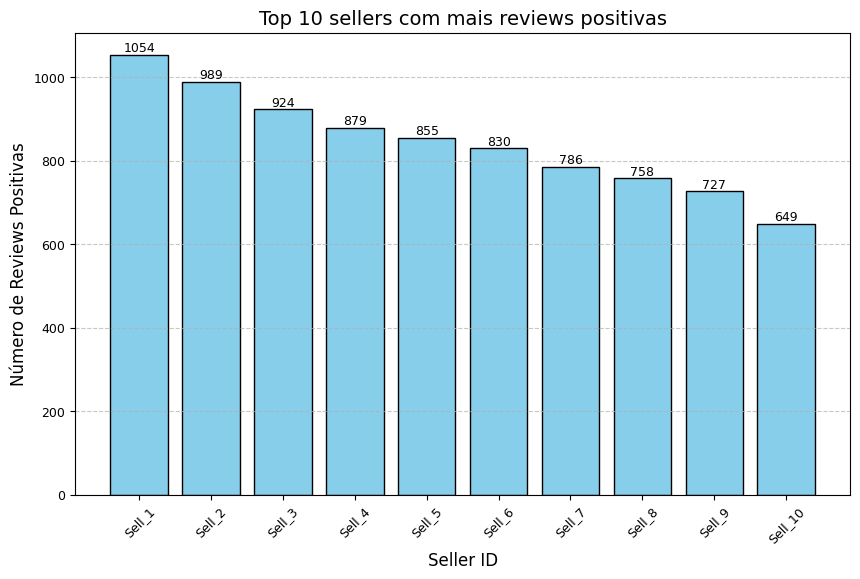

In [71]:
# Criar posição para cada barra

# list(dicionario_under_seller.keys())
x_positivas =list(dicionario_top_pos.keys())# top_positivas['seller_id']
y_positivas = list(top_positivas['reviews_positivas'])

plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_positivas, y_positivas, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_positivas)):
    plt.text(x_positivas[i], y_positivas[i], str(y_positivas[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers com mais reviews positivas', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Número de Reviews Positivas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

### 7) Top 10 piores sellers (com mais reviews negativas).


* Será considerado **Negativa** as notas **2** e **1**. 

In [72]:
top_negativas= resultado.sort_values(by = 'reviews_negativas')
top_negativas = top_negativas.tail(10)
top_negativas = top_negativas.drop(columns='reviews_positivas').sort_values(by = 'reviews_negativas', ascending=False)

In [73]:
top_negativas

,seller_id,reviews_negativas
1063,6560211a19b47992c3666cc44a7e94c0,255
769,4a3ca9315b744ce9f8e9374361493884,247
1312,7c67e1448b00f6e969d365cea6b010ab,195
326,1f50f920176fa81dab994f9023523100,184
2407,ea8482cd71df3c1969d7b9473ff13abc,173
2104,cc419e0650a3c5ba77189a1882b7556a,173
169,1025f0e2d44d7041d6cf58b6550e0bfa,155
1553,955fee9216a65b617aa5c0531780ce60,143
1457,8b321bb669392f5163d04c59e235e066,140
749,4869f7a5dfa277a7dca6462dcf3b52b2,138


In [74]:
lista_sellers_neg = top_negativas['seller_id']
# # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_neg= {f"Sell_{i+1}": lista_sellers_neg.iloc[i] for i in range(len(lista_sellers_neg))}

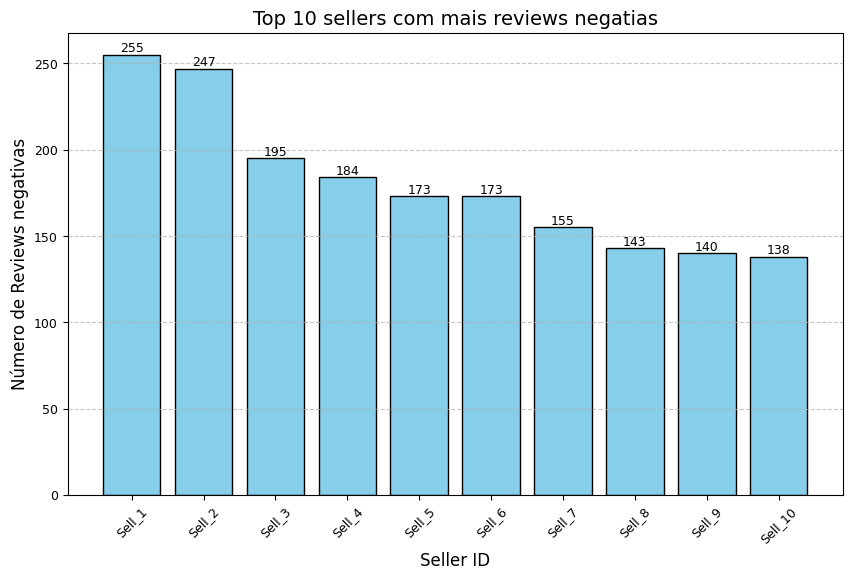

In [166]:
# Criar posição para cada barra

# list(dicionario_under_seller.keys())
x_negativas =list(dicionario_top_neg.keys())# top_positivas['seller_id']
y_negativas = list(top_negativas['reviews_negativas'])

plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_negativas, y_negativas, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_negativas)):
    plt.text(x_negativas[i], y_negativas[i], str(y_negativas[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers com mais reviews negatias', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Número de Reviews negativas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

Os seller_id listados abaixo aparecem tanto entre os melhores quanto entre os piores em avaliações. Isso acontece porque, sem um filtro por classificação, os vendedores com maior volume de vendas acumulam mais avaliações, tanto positivas quanto negativas, influenciando os resultados das análises.

In [76]:
top_negativas['seller_id'].loc[top_negativas['seller_id'].isin(top_positivas['seller_id'])]


1063    6560211a19b47992c3666cc44a7e94c0
769     4a3ca9315b744ce9f8e9374361493884
326     1f50f920176fa81dab994f9023523100
2407    ea8482cd71df3c1969d7b9473ff13abc
2104    cc419e0650a3c5ba77189a1882b7556a
169     1025f0e2d44d7041d6cf58b6550e0bfa
1553    955fee9216a65b617aa5c0531780ce60
1457    8b321bb669392f5163d04c59e235e066
749     4869f7a5dfa277a7dca6462dcf3b52b2
Name: seller_id, dtype: object

### 8)Existe relaçao entre a quantidade de vendas e a quantidade de reviews para os sellers? E possível identificar aumento ou queda na venda de um seller com base nas avaliações do que ja foi vendido no passado? 

In [77]:
print(df_reviews.columns, '\n')
df_reviews.info()

Index(['review_id', 'order_id', 'review_score', 'review_comment_message',
       'review_answer_timestamp', 'seller_id'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Index: 75654 entries, 0 to 85426
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                75654 non-null  object
 1   order_id                 75654 non-null  object
 2   review_score             75654 non-null  int64 
 3   review_comment_message   30922 non-null  object
 4   review_answer_timestamp  75654 non-null  object
 5   seller_id                75654 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.0+ MB


In [78]:
# será realizado a análise de dados de avaliações dos vendedores, agrupando e calculando as variações mensais.
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp']) #Converte a coluna 'review_answer_timestamp' para o tipo datetime.

# Criar agrupamento por seller_id e período (mensal) para calcular todas as vendas e a media e contagem de reviews.
df_grouped = df_reviews.groupby(['seller_id', df_reviews['review_answer_timestamp'].dt.to_period('M')]).agg({
    'order_id': 'nunique',       # Total de vendas (pedidos únicos)
    'review_score': ['mean', 'count']  # Média e contagem de reviews
}).reset_index()

# Ajusta os nomes das colunas do df
df_grouped.columns = ['seller_id', 'period', 'total_vendas', 'media_reviews', 'total_reviews']

# Ordena os dados por 'seller_id' e período para calcular variações
df_grouped.sort_values(by=['seller_id', 'period'], inplace=True)

# Calcular variação percentual nas vendas e nas avaliações
df_grouped['delta_vendas'] = df_grouped.groupby('seller_id')['total_vendas'].pct_change() #- Calcula a variação percentual entre os valores consecutivos de uma série.
df_grouped['delta_reviews'] = df_grouped.groupby('seller_id')['media_reviews'].pct_change()

# Identificar períodos com aumento ou queda nas vendas.
df_grouped['aumento_vendas'] = df_grouped['delta_vendas'] > 0
df_grouped['queda_vendas'] = df_grouped['delta_vendas'] < 0

# df_grouped.head()


In [158]:
df_grouped.head(1)

,seller_id,period,total_vendas,media_reviews,total_reviews,delta_vendas,delta_reviews,aumento_vendas,queda_vendas
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,3,3.666667,3,NaN,NaN,False,False


In [80]:
# Contagem de vendas e reviews por seller
seller_stats = df_reviews.groupby('seller_id').agg({'order_id': 'nunique', 'review_id': 'count'}) # conta as vendas pelo número de pedidos únicos. E conta as o numero de reviews

seller_stats.rename(columns={'order_id': 'total_vendas', 'review_id': 'total_reviews'}, inplace=True)

# Calculando correlação entre vendas e reviews
correlacao = seller_stats.corr().loc['total_vendas', 'total_reviews']
print(f"Correlação entre vendas e reviews: {correlacao}")


Correlação entre vendas e reviews: 0.9999859443143687


A correlação entre **vendas** e **reviews** de **0.9999859443143687** indica uma **correlação positiva extremamente forte** entre as duas variáveis. Isso significa que, à medida que o número de vendas aumenta, o número de reviews também aumenta quase proporcionalmente.

Em termos práticos, esse resultado sugere que os produtos que vendem mais tendem a receber mais avaliações. Isso pode ocorrer porque um maior volume de vendas naturalmente gera mais oportunidades para os clientes deixarem reviews, tanto positivos quanto negativos.

Essa correlação quase perfeita (muito próxima de 1) indica que há uma relação linear direta muito forte entre vendas e reviews, o que pode ser útil para prever o número de reviews com base no número de vendas, ou vice-versa.

## 3) Topico Livre

### 9) Topico livre: Traga mais algum insight que podemos observar no dataset mas que na o foi abordado nas perguntas.

* Top 10 melhores sellers (com mais reviews positivas) e Top 10 piores sellers (com mais reviews negativas)

#### 9.1) Analise reviews com base em subdivisoes

> A proposta de agrupamento visa solucionar o problema identificado nos tópicos 6 e 7, no qual os vendedores com maior volume de vendas aparecem simultaneamente no ranking de avaliações negativas e positivas. Esse comportamento pode gerar distorções na análise dos dados, pois não leva em consideração o contexto das vendas em relação às avaliações, misturando resultados que poderiam ser mais bem segmentados. O agrupamento busca, portanto, separar de maneira mais eficaz os vendedores com maior número de avaliações positivas e negativas, proporcionando uma visão mais precisa e representativa de sua performance.

In [81]:
# criando filtro para selecionar uma faixa de vendedores
filtro_vendedores = df_reviews.groupby(['seller_id'], as_index=False)['review_id'].nunique() #Conta quantos avaliações o vendedor teve
filtro_vendedores = filtro_vendedores.rename(columns={'review_id':'cont_reviews'}) # renomeia a col. só para não ficar confuso
filtro_vendedores.sort_values(by='cont_reviews' , ascending=False, inplace=True)
filtro_vendedores.head()
# esse filtro servirÁ apenas para selecionar quais vendedores estão aptos para analise de reviews.

,seller_id,cont_reviews
1063,6560211a19b47992c3666cc44a7e94c0,1464
1553,955fee9216a65b617aa5c0531780ce60,1249
326,1f50f920176fa81dab994f9023523100,1198
769,4a3ca9315b744ce9f8e9374361493884,1151
2104,cc419e0650a3c5ba77189a1882b7556a,1135


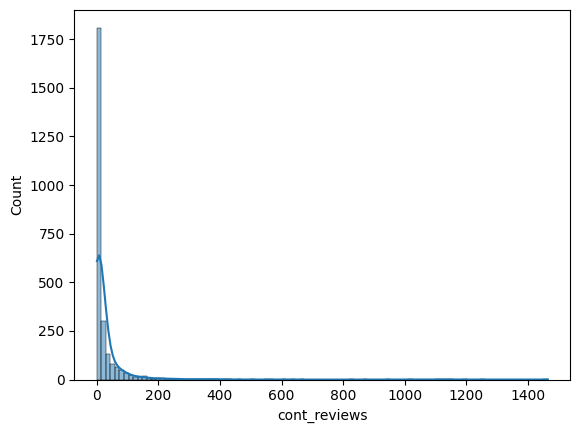

In [82]:
# sns.boxplot(y='review_id', data=filtro_vendedores); #não  fica boa a visualização
sns.histplot(filtro_vendedores, x= 'cont_reviews', bins=100, kde=True); # distribuição das avaliações por agrupamento de vendedores

**Agrupamento com base em quantidade de vendas / reviews**
Considea agrupar os vendedores com base no volume de comentários/vendas.

Será agrupado por faixas dos Percentis:
- "**Baixo** número de comentários" (<25%).  (Poderá não ser descartado da analise final.)
- "**Médio**" (25%-75%).
- "**Alto** número de comentários" (>75%).
- **Outliers**: Separe vendedores com números extremos em uma categoria distinta.  (Não será descartado.)

Isso ajuda a entender como diferentes grupos se comportam e evita generalizações que podem ser enviesadas pelos outliers.

In [ ]:
# filtro_vendedores.describe()

In [83]:
q1 = filtro_vendedores['cont_reviews'].quantile(0.25)
q3 = filtro_vendedores['cont_reviews'].quantile(0.75)

iqr = q3 - q1
outlier = q3 + 1.5 * iqr
# print (f'Q1: {q1} \nQ3: {q3} \nOutlier: {outlier}')

filtro_vendedores['agrupamento'] = None

 # Criação das faixas de agrupamento 
filtro_vendedores.loc[filtro_vendedores['cont_reviews'] < 3, 'agrupamento'] = 'baixo' # pega o Q1
filtro_vendedores.loc[(filtro_vendedores['cont_reviews'] > 2) & (filtro_vendedores['cont_reviews'] < 22),'agrupamento'] = 'medio' # pega do Q2 ao Q3
filtro_vendedores.loc[(filtro_vendedores['cont_reviews'] > 21) & (filtro_vendedores['cont_reviews'] < 50),'agrupamento'] = 'alto' # pega do Q3 ate o limite superio. 
filtro_vendedores.loc[(filtro_vendedores['cont_reviews'] > 49),'agrupamento']='Outlier' # acima do limite superior

# Visualização do df agrupado
filtro_vendedores.head()


,seller_id,cont_reviews,agrupamento
1063,6560211a19b47992c3666cc44a7e94c0,1464,Outlier
1553,955fee9216a65b617aa5c0531780ce60,1249,Outlier
326,1f50f920176fa81dab994f9023523100,1198,Outlier
769,4a3ca9315b744ce9f8e9374361493884,1151,Outlier
2104,cc419e0650a3c5ba77189a1882b7556a,1135,Outlier


In [160]:
ranking_vendedores = df_reviews.groupby(['seller_id'], as_index=False)['review_score'].mean()
# O DF será ordenado para extrai os 10 primeiros(vendedores) e os 10 ultimos (vendedores)
ranking_vendedores = ranking_vendedores.sort_values(by=['review_score'] , ascending = False)
ranking_vendedores = ranking_vendedores.rename(columns={'review_score':'media_review_score'})

In [161]:
ranking_vendedores.head(1)

,seller_id,media_review_score
2589,fdf736c18c589ed030e058312203e1b2,5.0


In [163]:
# façoa aunião dos dfs para fazer o filtro com base no agrupamento
ranking_vendedores = ranking_vendedores.merge(filtro_vendedores[['seller_id','cont_reviews' ,'agrupamento']], on='seller_id', how='inner')

In [164]:
ranking_vendedores.head(1)

,seller_id,media_review_score,cont_reviews,agrupamento
0,fdf736c18c589ed030e058312203e1b2,5.0,1,baixo


In [86]:
# crio um dataframe para cada agrupamento
sellers_out = ranking_vendedores.loc[ranking_vendedores['agrupamento']=='Outlier']
sellers_alto = ranking_vendedores.loc[ranking_vendedores['agrupamento']=='alto']
sellers_medio = ranking_vendedores.loc[ranking_vendedores['agrupamento']=='medio']

In [165]:
sellers_out.head(1)

,seller_id,media_review_score,cont_reviews,agrupamento
500,d13e50eaa47b4cbe9eb81465865d8cfc,4.820896,67,Outlier


##### 9.1.1 -  Sellers considerado Outliers em número de vendas.

Ranking Top 10 reviesw positivas.

In [87]:
sellers_out.sort_values(by='media_review_score', ascending=False, inplace=True)
top_sellers_out = sellers_out.head(10)
top_sellers_out

,seller_id,media_review_score,cont_reviews,agrupamento
500,d13e50eaa47b4cbe9eb81465865d8cfc,4.820896,67,Outlier
531,d9bd94811c3338dceb4181f3dbc0c73e,4.796296,54,Outlier
601,d566c37fa119d5e66c4e9052e83ee4ea,4.687500,64,Outlier
678,116ccb1a1604bc88e4d234a8c23f33de,4.639344,61,Outlier
697,1bb2bdb95f4841f1bba2c0d2cd83d3c9,4.616438,73,Outlier
698,080199a181c46c657dc5aa235411be3b,4.615385,78,Outlier
725,ac3508719a1d8f5b7614b798f70af136,4.595238,84,Outlier
731,e882b2a25a10b9c057cc49695f222c19,4.586207,58,Outlier
735,c864036feaab8c1659f65ea4faebe1da,4.574074,54,Outlier
736,5b925e1d006e9476d738aa200751b73b,4.573770,61,Outlier


In [103]:
# Os dez primeiros vendedores.

lista_sellers = top_sellers_out['seller_id'].to_list()

# # # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_pos= {f"Sell_{i+1}": lista_sellers[i] for i in range(len(lista_sellers))}
# dicionario_top_pos

# y_media_review

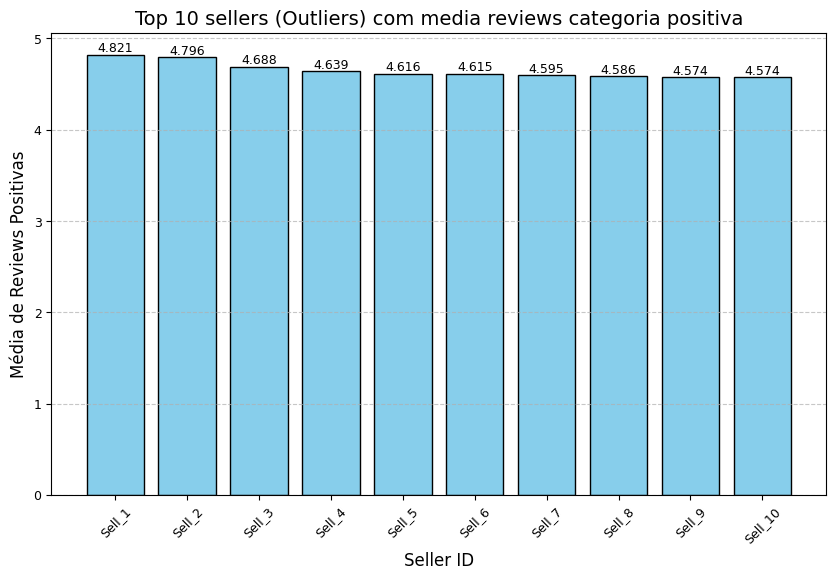

In [124]:
# Criar posição para cada barra
x_media_review = list(dicionario_top_pos.keys())
y_media_review = list(round(top_sellers_out['media_review_score'],3))


plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_media_review, y_media_review, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_media_review)):
    plt.text(x_media_review[i], y_media_review[i], str(y_media_review[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers (Outliers) com media reviews categoria positiva', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Média de Reviews Positivas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

In [105]:
# visualizar o nome dos vendedores com seus respectivos ids
dicionario_top_pos

{'Sell_1': 'd13e50eaa47b4cbe9eb81465865d8cfc',
 'Sell_2': 'd9bd94811c3338dceb4181f3dbc0c73e',
 'Sell_3': 'd566c37fa119d5e66c4e9052e83ee4ea',
 'Sell_4': '116ccb1a1604bc88e4d234a8c23f33de',
 'Sell_5': '1bb2bdb95f4841f1bba2c0d2cd83d3c9',
 'Sell_6': '080199a181c46c657dc5aa235411be3b',
 'Sell_7': 'ac3508719a1d8f5b7614b798f70af136',
 'Sell_8': 'e882b2a25a10b9c057cc49695f222c19',
 'Sell_9': 'c864036feaab8c1659f65ea4faebe1da',
 'Sell_10': '5b925e1d006e9476d738aa200751b73b'}

##### 9.1.2 - Sellers considerado Alto em número de vendas.

Ranking Top 10 reviesw positivas.

In [96]:
sellers_alto.sort_values(by='media_review_score', ascending=False, inplace=True)
top_sellers_alto = sellers_alto.head(10)
# top_sellers_alto

In [ ]:
lista_sellers = top_sellers_alto['seller_id'].to_list()

# # # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_pos= {f"Sell_{i+1}": lista_sellers[i] for i in range(len(lista_sellers))}
# dicionario_top_pos

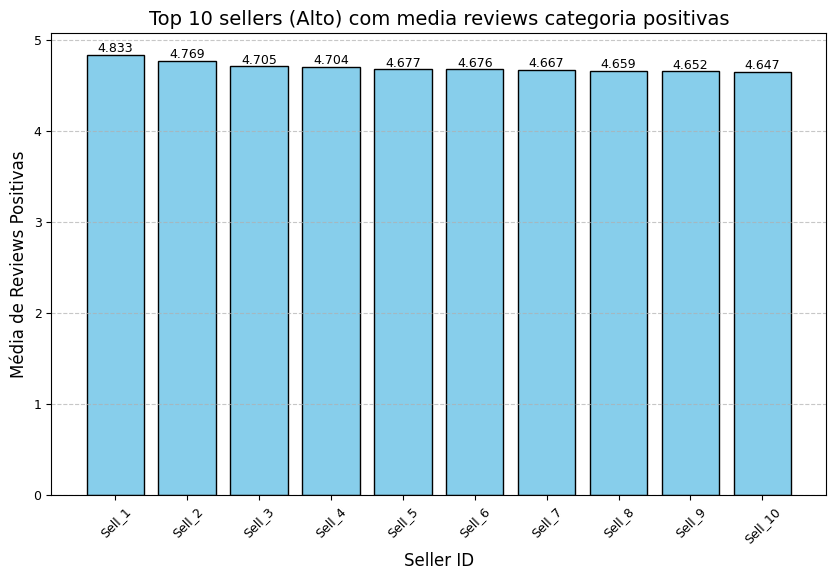

In [123]:
# Os dez primeiros vendedores.

# Criar posição para cada barra
x_media_review = list(dicionario_top_pos.keys())
y_media_review = list(round(top_sellers_alto['media_review_score'],3))


plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_media_review, y_media_review, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_media_review)):
    plt.text(x_media_review[i], y_media_review[i], str(y_media_review[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers (Alto) com media reviews categoria positivas', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Média de Reviews Positivas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

In [110]:
# visualizar o nome dos vendedores com seus respectivos ids
dicionario_top_pos

{'Sell_1': '02f5837340d7eb4f653d676c7256523a',
 'Sell_2': '7ade73f1b9b4e965f9009a4c3a7e2c15',
 'Sell_3': '376a891762bbdecbc02b4b6adec3fdda',
 'Sell_4': '671585f5a2af58b6e276bc01003c0d2b',
 'Sell_5': '18e694e0e48ed6f7aa3f24aade5fd697',
 'Sell_6': '5f1dc28029d2c244352a68107ec2b542',
 'Sell_7': 'cc3d14116804f7209f3884f6367f1152',
 'Sell_8': 'b410bdd36d5db7a65dcd42b7ead933b8',
 'Sell_9': '42ef3192a9ff87a22d1867b74b3ee205',
 'Sell_10': '43f8c9950d11ecd03a0304a49e010da6'}

#### 9.1.3 - Sellers considerado Outliers em número de vendas.

Ranking Top 10 reviesw negativas.

In [115]:
sellers_out.sort_values(by='media_review_score',ascending=False ,inplace=True)
under_sellers_out = sellers_out.tail(10)
under_sellers_out = under_sellers_out.sort_values(by = 'media_review_score')

In [116]:
lista_sellers = under_sellers_out['seller_id'].to_list()

# # # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_pos= {f"Sell_{i+1}": lista_sellers[i] for i in range(len(lista_sellers))}
dicionario_top_pos

{'Sell_1': '1ca7077d890b907f89be8c954a02686a',
 'Sell_2': '2eb70248d66e0e3ef83659f71b244378',
 'Sell_3': 'a49928bcdf77c55c6d6e05e09a9b4ca5',
 'Sell_4': '54965bbe3e4f07ae045b90b0b8541f52',
 'Sell_5': '710e3548e02bc1d2831dfc4f1b5b14d4',
 'Sell_6': '972d0f9cf61b499a4812cf0bfa3ad3c4',
 'Sell_7': 'bbad7e518d7af88a0897397ffdca1979',
 'Sell_8': '602044f2c16190c2c6e45eb35c2e21cb',
 'Sell_9': '8444e55c1f13cd5c179851e5ca5ebd00',
 'Sell_10': '712e6ed8aa4aa1fa65dab41fed5737e4'}

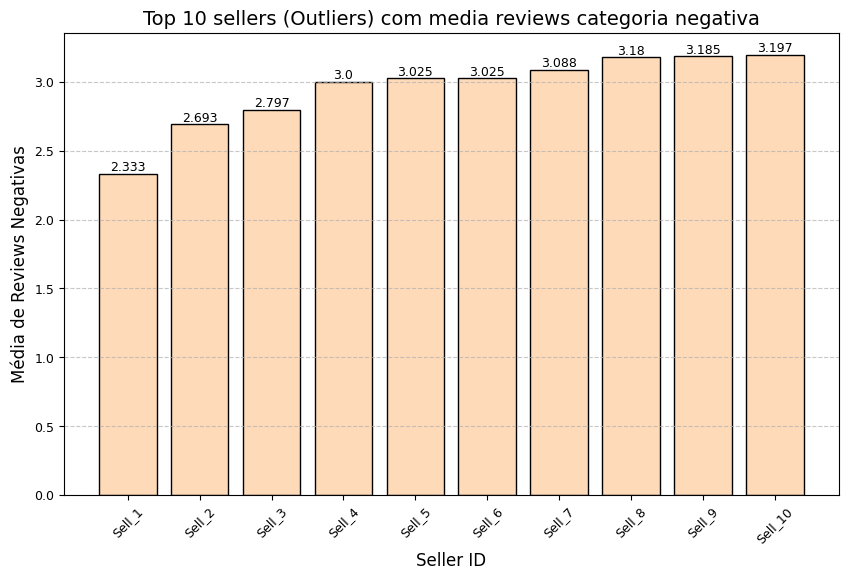

In [122]:
# Os dez primeiros vendedores.

# Criar posição para cada barra
x_media_review = list(dicionario_top_pos.keys())
y_media_review = list(round(under_sellers_out['media_review_score'],3))


plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_media_review, y_media_review, color='#FFDAB9', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_media_review)):
    plt.text(x_media_review[i], y_media_review[i], str(y_media_review[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers (Outliers) com media reviews categoria negativa', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Média de Reviews Negativas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

##### 9.1.4 - Sellers considerado Alto em número de vendas.

Ranking Top 10 reviesw negativas.

In [126]:
sellers_alto.sort_values(by='media_review_score',ascending=False ,inplace=True)
under_sellers_alto = sellers_alto.tail(10)
under_sellers_alto = under_sellers_alto.sort_values(by = 'media_review_score')

In [127]:
lista_sellers = under_sellers_alto['seller_id'].to_list()

# # # Criação do dicionário com chaves "Seller 1" até "Seller 10"
dicionario_top_pos= {f"Sell_{i+1}": lista_sellers[i] for i in range(len(lista_sellers))}
# dicionario_top_pos

{'Sell_1': 'd71d863e5ef30d94e440c11be17dcd8f',
 'Sell_2': 'd20b021d3efdf267a402c402a48ea64b',
 'Sell_3': '070d165398b553f3b4b851c216b8a358',
 'Sell_4': 'ad781527c93d00d89a11eecd9dcad7c1',
 'Sell_5': 'c60b801f2d52c7f7f91de00870882a75',
 'Sell_6': '821fb029fc6e495ca4f08a35d51e53a5',
 'Sell_7': '0b35c634521043bf4b47e21547b99ab5',
 'Sell_8': 'b14db04aa7881970e83ffa9426897925',
 'Sell_9': '4e5725ba188db8252977a4f0227bd462',
 'Sell_10': 'bc47d5d1490df2b36add65d733eafaba'}

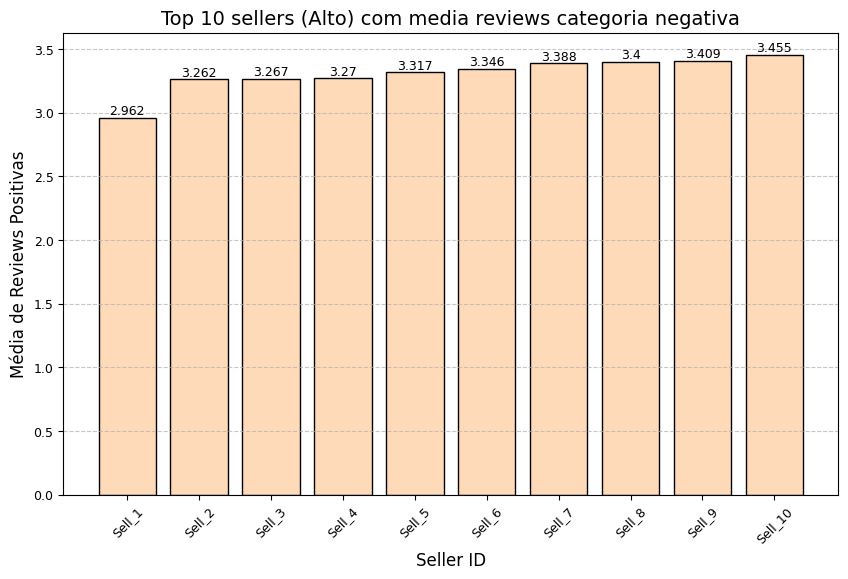

In [129]:
# Os dez primeiros vendedores.

# Criar posição para cada barra
x_media_review = list(dicionario_top_pos.keys())
y_media_review = list(round(under_sellers_alto['media_review_score'],3))


plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura

# Cria o grafico
grafico = plt.bar(x_media_review, y_media_review, color='#FFDAB9', edgecolor='black')
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

for i in range(len(y_media_review)):
    plt.text(x_media_review[i], y_media_review[i], str(y_media_review[i]), 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 sellers (Alto) com media reviews categoria negativa', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Média de Reviews Positivas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

plt.show()

In [130]:
dicionario_top_pos

{'Sell_1': 'd71d863e5ef30d94e440c11be17dcd8f',
 'Sell_2': 'd20b021d3efdf267a402c402a48ea64b',
 'Sell_3': '070d165398b553f3b4b851c216b8a358',
 'Sell_4': 'ad781527c93d00d89a11eecd9dcad7c1',
 'Sell_5': 'c60b801f2d52c7f7f91de00870882a75',
 'Sell_6': '821fb029fc6e495ca4f08a35d51e53a5',
 'Sell_7': '0b35c634521043bf4b47e21547b99ab5',
 'Sell_8': 'b14db04aa7881970e83ffa9426897925',
 'Sell_9': '4e5725ba188db8252977a4f0227bd462',
 'Sell_10': 'bc47d5d1490df2b36add65d733eafaba'}

**Conclusão Tópico 9.1**
> Em conclusão, a aplicação do agrupamento foi eficaz para solucionar as distorções identificadas nas análises dos tópicos 6 e 7. Ao separar de forma adequada os vendedores com maior número de vendas nos rankings de avaliações positivas e negativas, a análise tornou-se mais justa e precisa. Dessa forma, conseguimos uma visão mais equilibrada e representativa da performance dos vendedores, eliminando as interferências causadas pela concentração de vendas em um único ranking. O processo de agrupamento, portanto, contribuiu para uma avaliação mais consistente e confiável dos dados, aprimorando a qualidade das conclusões extraídas.

#### 9.2) Analise sobre os dados de geolocalização.

Este tópico tem como objetivo analisar a distribuição geográfica dos vendedores, buscando identificar padrões e gerar possíveis novos insights que possam orientar estratégias de vendas em estudos futuros. Para facilitar a análise, será gerado um heatmap que agrupa os vendedores com base em sua geolocalização, destacando concentrações e lacunas em diferentes regiões.


In [131]:
df_geo = pd.read_csv('.\\Datasets\\olist_geolocation_dataset.csv')
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Como não há uma chave única que relacione cada vendedor a uma coordenada específica, será necessário excluir prefixos repetidos. Essa exclusão é importante para evitar distorções nos resultados, garantindo que o heatmap reflita informações mais precisas e úteis para a análise.

In [132]:
# Verificando se há valores duplicados
print(df_geo.shape)
print(df_geo['geolocation_zip_code_prefix'].duplicated().sum())

# Excluindo os valores duplicados de prefixo, pois eles podem ter latitudes e longitudes diferentes, 
# # isto iria atrapalhar a analise pois não há outra chave que ligaria uma unica coordena ao vendedor ou comprador.
df_geo.drop_duplicates(subset='geolocation_zip_code_prefix', inplace=True)
print(df_geo.shape)

(1000163, 5)
981148
(19015, 5)


In [133]:
df_seller = pd.read_csv('.\\Datasets\\olist_sellers_dataset.csv')
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [134]:
len(df_seller)
df_seller['seller_id'].isnull().sum()

np.int64(0)

In [135]:
# será feito um merge entre os df_seller e df_geo para obter a localização dos vendedores
df_seller_geo = df_seller.merge(df_geo, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
len(df_seller_geo)

3088

In [136]:
# somente as colunas necessárias ficaram presentes
df_seller_geo = df_seller_geo[['seller_id','seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']]
df_seller_geo.head()

,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641,mogi-guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618,bragança paulista,SP


In [137]:
# locais sera utilizado para plotar os vendedores no mapa.
locais = df_seller_geo[['geolocation_lat', 'geolocation_lng']]
locais

,geolocation_lat,geolocation_lng
0,-22.898536,-47.063125
1,-22.382941,-46.946641
2,-22.910641,-43.176510
3,-23.657250,-46.610759
4,-22.971648,-46.533618
...,...,...
3083,-23.456431,-51.866369
3084,-27.623801,-48.674286
3085,-23.659845,-46.677882
3086,-31.744231,-52.328761


O mapa abaixo ilustra a concentração de vendedores por localização. Regiões em tons mais próximos ao vermelho indicam uma maior densidade de vendedores. Esta análise foi realizada utilizando as coordenadas do dataframe de geolocalização, associadas aos zip codes dos vendedores.

In [138]:
# Importar os mapas da  biblioteca folium

min_lon, max_lon = -45, -35
min_lat, max_lat = -25, -15

m = folium.Map(
    max_bounds=True,
    location=[-20, -40],
    zoom_start=6,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon,
    min_zoom=5,# para poeder interar com o mapa dando zoom é só comentar as duas linhas
    max_zoom=5 # para poeder interar com o mapa dando zoom é só comentar as duas linhas
)
HeatMap(
    name='mapa de calor',
    data=locais,  # pontos,
    radius=12,
    max_zoom=10
).add_to(m)

m

**Figura para visualização no GitHub.**

Como o GiutHub não é possibilita a visualização do mapa do Folium, será criado uma figura para visualização do resultado obtido. Localmente a figura pode ser descartada pois o mapa é interativo e pode ser mais interesante.

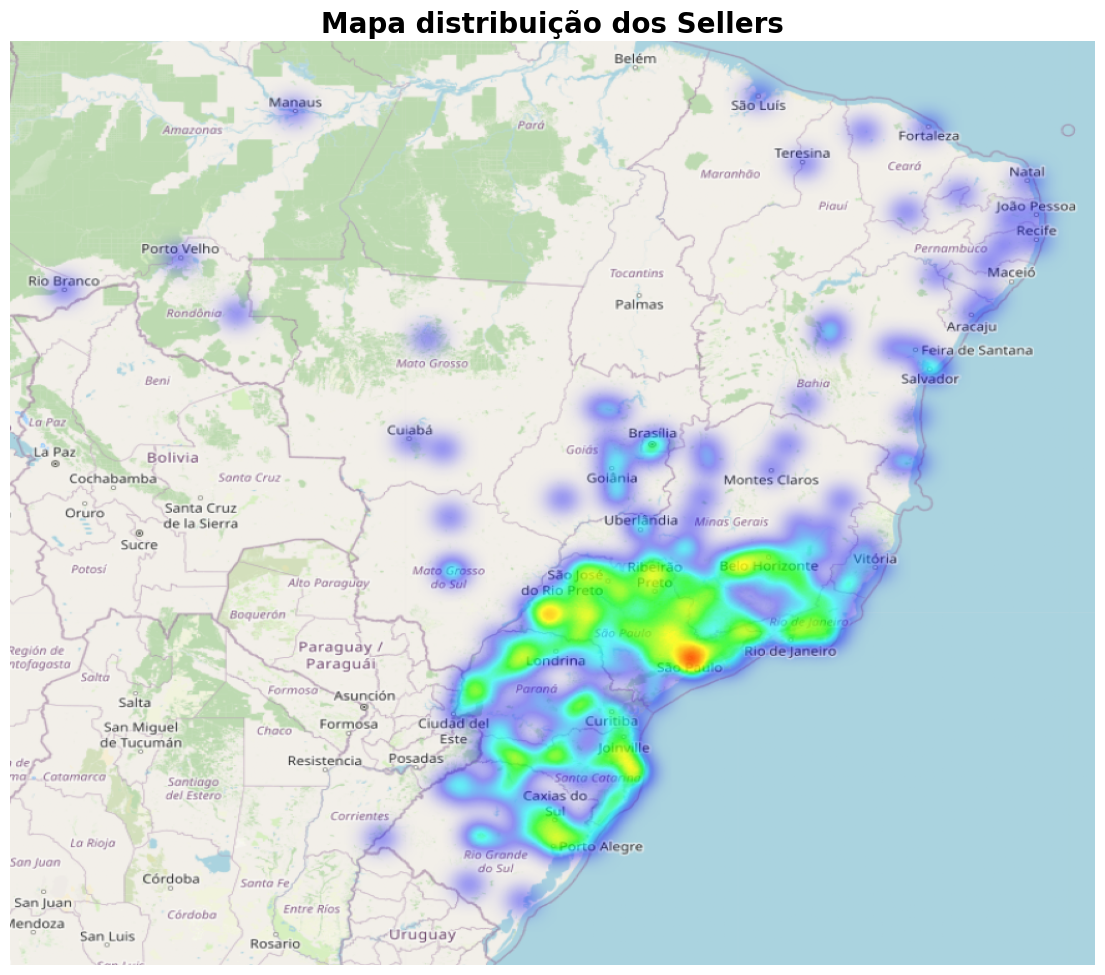

In [140]:
mapa = mpimg.imread('.\\imgs\\fig_1.png')


 
#  Ajustar o tamanho da figura
plt.figure(figsize=(14, 12))

# Exibir a imagem
plt.imshow(mapa, aspect='auto')
plt.axis('off')  # Remover os eixos para melhor visualização
plt.title('Mapa distribuição dos Sellers', fontsize=20, fontweight='bold')
plt.show()

#### **Conclusão**

> Concluindo, o mapa gerado nos permite observar claramente que a maior concentração de vendedores está no estado de São Paulo, com uma parcela significativa localizada no interior do estado.Belo Horizonte támbem tem um número alto de vendedores. Além disso, outras áreas que se destacam são a região Sul, especialmente nas proximidades de Joinville, em Santa Catarina, e Porto Alegre, no Rio Grande do Sul. É importante destacar que o mapa reflete a densidade de vendedores em diferentes regiões, mas não indica a performance de vendas ou quais vendedores realizaram o maior número de transações. Essa distinção é fundamental para evitar interpretações equivocadas dos dados apresentados.

Fim.